In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas

In [45]:
# Connecting to my Snowflake account 
conn = snowflake.connector.connect (
    user= "NOMINERDENE",
    password= '*****',
    account= "FHNWFWN-OT79270",
    database= "Python",
    schema= "Assessment"
)

In [53]:
# Extracting CSV file 
dfo= pd.read_csv('/Users/nominnemo/Desktop/Python tasks/Python Assignment/starbucks.csv')
dfo.head(1)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175


In [46]:
#Connecting and creating table in the Snowflake 
write_pandas(conn, df, "starbucks", auto_create_table=True)

(True,
 1,
 242,
 [('vpgsydqovt/file0.txt', 'LOADED', 242, 242, 1, 0, None, None, None, None)])

In [71]:
# Fetching data from snowflake and put in dataframe
cur = conn.cursor()
cur.execute('SELECT * FROM "starbucks"')
df = cur.fetch_pandas_all()
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [55]:
## Quesion 1-  Number of beverage categories 
categories = df['Beverage_category'].unique()
num_categories = len(categories)
print(f"Starbucks has {num_categories} categories of products.")

Starbucks has 9 categories of products.


In [56]:
## Question 2  - Beverages with over 350 calories 
calories_array = df['Calories'].to_numpy()

mask = calories_array > 350
filtered_df = df[mask]
print(filtered_df[['Beverage', 'Calories']])

                                          Beverage  Calories
81   White Chocolate Mocha (Without Whipped Cream)       400
82   White Chocolate Mocha (Without Whipped Cream)       370
83   White Chocolate Mocha (Without Whipped Cream)       450
84   White Chocolate Mocha (Without Whipped Cream)       510
85   White Chocolate Mocha (Without Whipped Cream)       460
96           Hot Chocolate (Without Whipped Cream)       380
101    Caramel Apple Spice (Without Whipped Cream)       360
127                          Tazo® Green Tea Latte       370
128                          Tazo® Green Tea Latte       450
129                          Tazo® Green Tea Latte       390
197                  Mocha (Without Whipped Cream)       390
206                Caramel (Without Whipped Cream)       370
214              Java Chip (Without Whipped Cream)       420
215              Java Chip (Without Whipped Cream)       460
216              Java Chip (Without Whipped Cream)       430


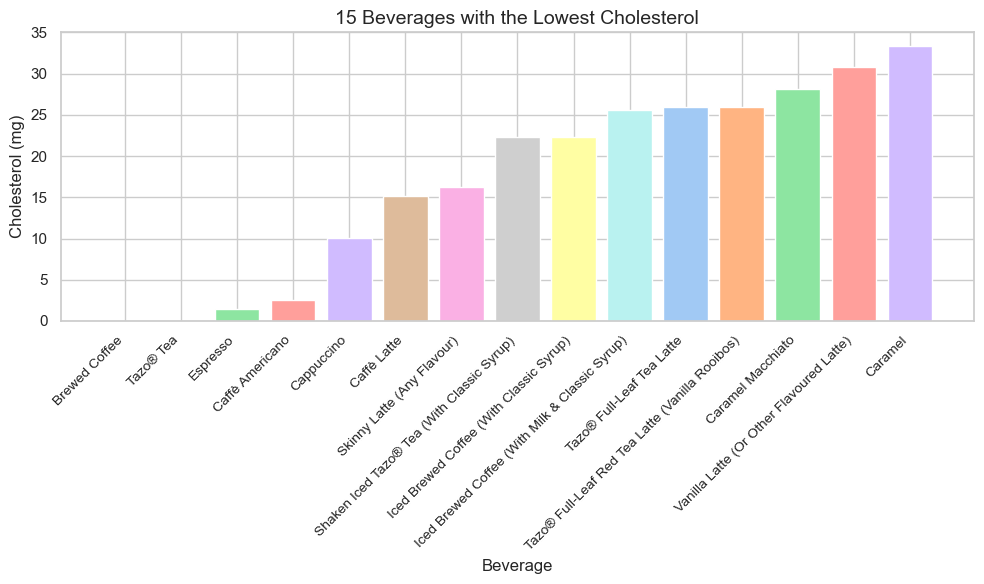

In [80]:
## Question 3 - What are the 15 lowest cholesterol drinks? 
low_cholesterol = df.groupby('Beverage')['Cholesterol (mg)'].mean().sort_values(ascending=True).head(15)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) 
colors = sns.color_palette('pastel')
plt.bar(low_cholesterol.index, low_cholesterol.values, color=colors) 
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Beverage', fontsize=12)
plt.ylabel('Cholesterol (mg)', fontsize=12)
plt.title('15 Beverages with the Lowest Cholesterol', fontsize=14)
plt.tight_layout()  
plt.show()

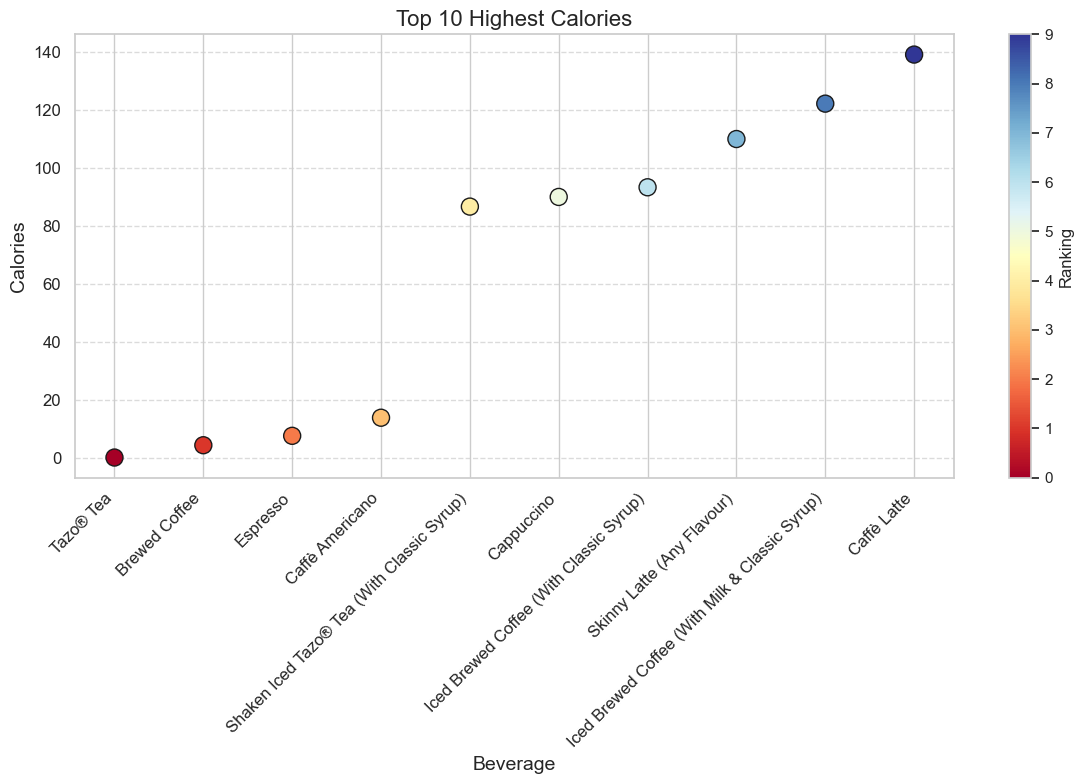

In [69]:
## Question 4 - What are the top 10 drinks with highest calories? 
highest_calories = df.groupby('Beverage')['Calories'].mean().sort_values(ascending=True).head(10)

sns.set(style="whitegrid")
custom_palette = sns.color_palette("RdYlBu", len(highest_calories))
plt.figure(figsize=(12, 8))
scatter = plt.scatter(highest_calories.index, highest_calories.values, c=range(len(highest_calories)), cmap='RdYlBu', s=150, edgecolor='k', linewidths=1)

cbar = plt.colorbar(scatter)
cbar.set_label('Ranking', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Beverage', fontsize=14)
plt.ylabel('Calories', fontsize=14)
plt.title('Top 10 Highest Calories', fontsize=16)


plt.tight_layout()
plt.show()

In [72]:
# Convert the type of "Caffeine mg" column from obj to float
df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'], errors='coerce').fillna(0)

/Users/nominnemo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nominnemo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


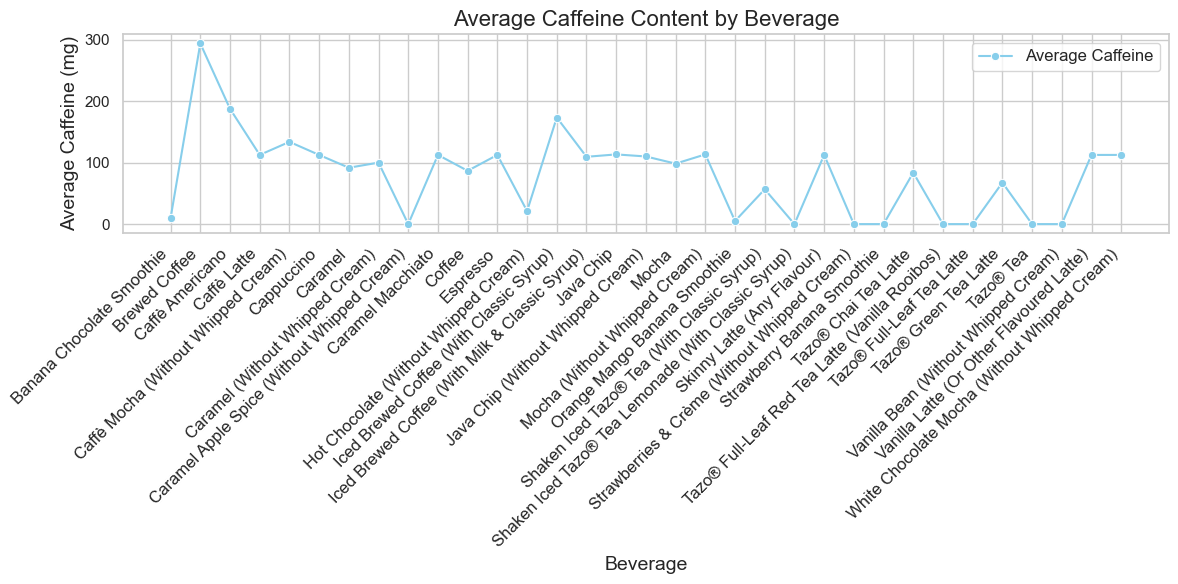

In [76]:
## Question 5 - Average caffeine by category  
avg_caffeine_by_category = df.groupby('Beverage')['Caffeine (mg)'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_caffeine_by_category, x='Beverage', y='Caffeine (mg)', marker='o', color='skyblue', label='Average Caffeine')


plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Beverage', fontsize=14)
plt.ylabel('Average Caffeine (mg)', fontsize=14)
plt.title('Average Caffeine Content by Beverage', fontsize=16)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()